### Time Series Anomaly detection

In [ ]:
# importing relevant libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from keras import models
from keras import layers
from keras.layers import Input, Dense, Dropout, Lambda, Flatten, Reshape, LSTM
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.models import Model, Sequential
import matplotlib.pyplot as plt

# Set random seed
np.random.seed(0)

In [ ]:
import pandas as pd

In [ ]:
data=pd.read_csv('creditcard.csv')
data

,Time (second),V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


#### data exploration

In [ ]:
data.head()

,Time (second),V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Time (second)  284807 non-null  float64
 1   V1             284807 non-null  float64
 2   V2             284807 non-null  float64
 3   V3             284807 non-null  float64
 4   V4             284807 non-null  float64
 5   V5             284807 non-null  float64
 6   V6             284807 non-null  float64
 7   V7             284807 non-null  float64
 8   V8             284807 non-null  float64
 9   V9             284807 non-null  float64
 10  V10            284807 non-null  float64
 11  V11            284807 non-null  float64
 12  V12            284807 non-null  float64
 13  V13            284807 non-null  float64
 14  V14            284807 non-null  float64
 15  V15            284807 non-null  float64
 16  V16            284807 non-null  float64
 17  V17            284807 non-nul

In [ ]:
# checking for null values
data.isnull().sum()

Time (second)    0
V1               0
V2               0
V3               0
V4               0
V5               0
V6               0
V7               0
V8               0
V9               0
V10              0
V11              0
V12              0
V13              0
V14              0
V15              0
V16              0
V17              0
V18              0
V19              0
V20              0
V21              0
V22              0
V23              0
V24              0
V25              0
V26              0
V27              0
V28              0
Amount           0
Class            0
dtype: int64

In [ ]:
data.shape

(284807, 31)

In [ ]:
# we must remove duplicates
data=data.drop_duplicates()
data.shape

(283726, 31)

In [ ]:
data.head()

,Time (second),V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### Visualizing the data

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler

#### Fraud vs Valid

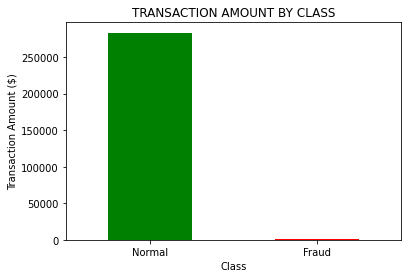

In [ ]:
# Plot the distribution of the target variable (fraud or not fraud)
count_classes = pd.value_counts(data['Class'], sort = True)
count_classes.plot(kind = 'bar', rot=0,color=['g', 'r'])
plt.title("Transaction Amount by Class".upper())
plt.xticks(range(2), ['Normal','Fraud'])
plt.xlabel("Class")
plt.ylabel("Transaction Amount ($)");

#### As a time series

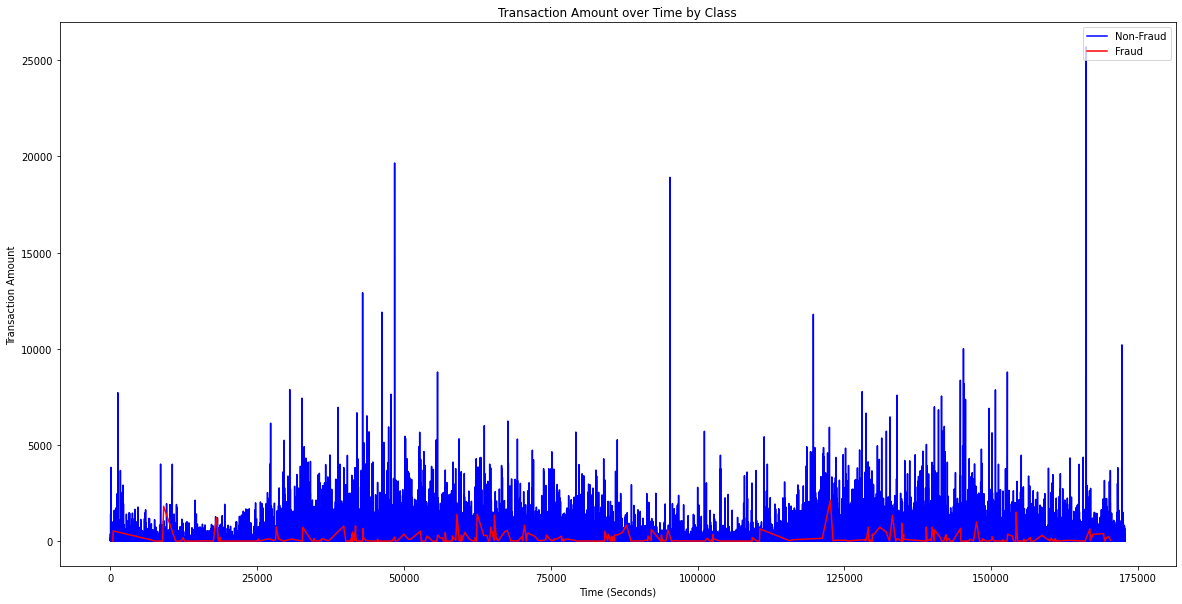

In [ ]:
# Separate the fraud and non-fraud transactions
fraud = data[data['Class'] == 1]
non_fraud = data[data['Class'] == 0]

# Plot the transaction amount over time
fig, ax = plt.subplots(figsize=(20,10)) # set the size of the figure
ax.plot(non_fraud['Time (second)'], non_fraud['Amount'], color='b', alpha=1, label='Non-Fraud')
ax.plot(fraud['Time (second)'], fraud['Amount'], color='r', alpha=1, label='Fraud')
ax.set_title('Transaction Amount over Time by Class')
ax.set_xlabel('Time (Seconds)')
ax.set_ylabel('Transaction Amount')
ax.legend(loc='upper right')
plt.show()

### Feature selection

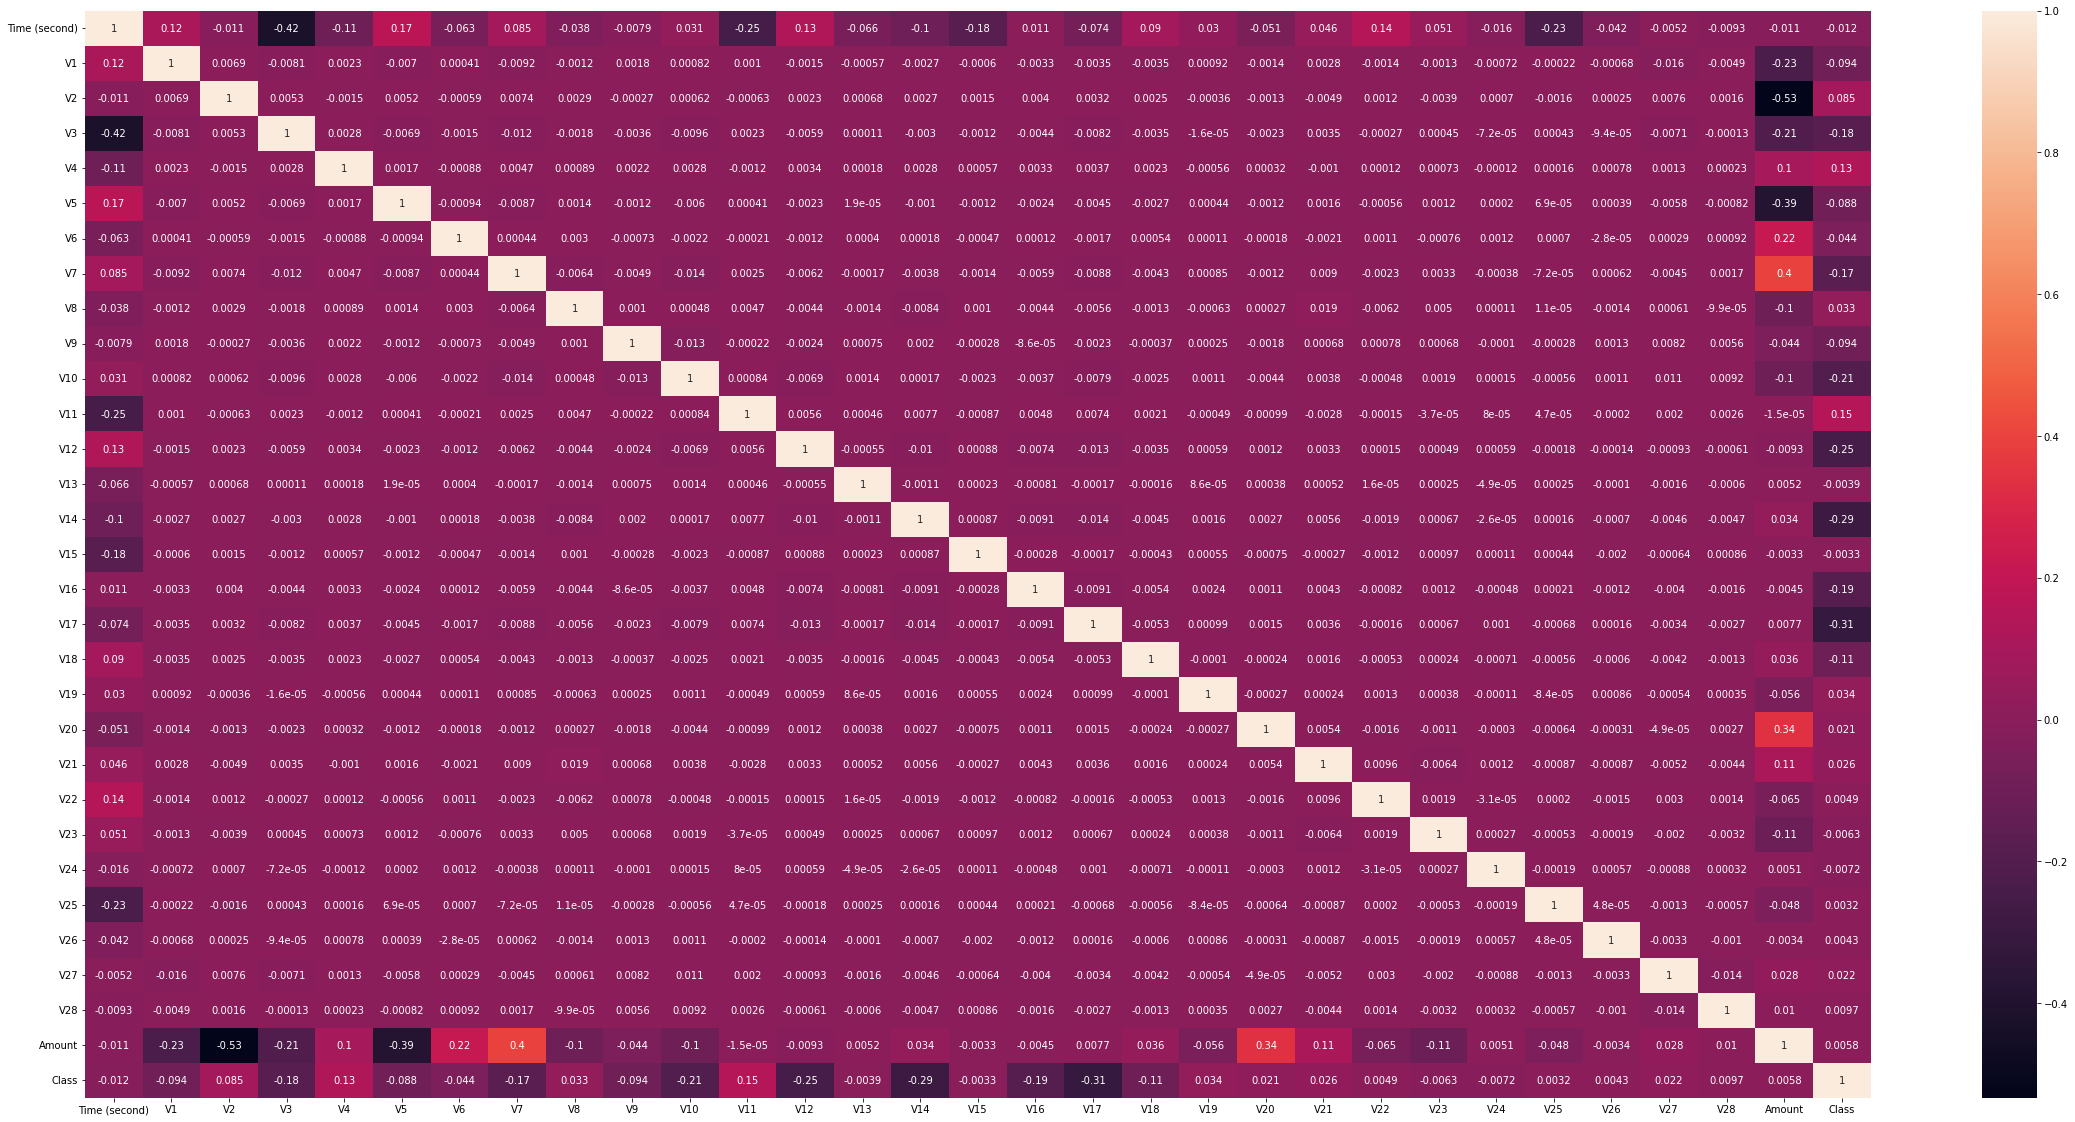

In [ ]:
# plot the correlation matrix and use the results for feature selection
import seaborn as sns
plt.figure(figsize = (40,20))
sns.heatmap(data.corr(), annot = True)
plt.show()

In [ ]:
# based on the correlation matrix, the following features had low correlation and will be further selected as the most important
chosen_features=['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10','V11', 'V12', 'V13', 'V14', 'V15', 'V16','V17','V18','V19','V20','V21','V22', 'V23','V24', 'V25', 'V26', 'V27','V28','Class']
new_data=data[chosen_features]
sc = StandardScaler()
X=new_data
X=sc.fit_transform(X)
X=pd.DataFrame(X,columns=chosen_features)
X=X.drop(['Class'],axis=1)

y=new_data['Class']
print(X)

              V1        V2        V3        V4        V5        V6        V7  \
0      -0.701082 -0.041687  1.680101  0.976623 -0.247020  0.348012  0.193700   
1       0.608792  0.164138  0.109279  0.318998  0.042258 -0.060980 -0.065656   
2      -0.700336 -0.811337  1.174270  0.270648 -0.366756  1.352655  0.643223   
3      -0.499064 -0.109972  1.187383 -0.608355 -0.008814  0.937245  0.192079   
4      -0.597606  0.535539  1.025470  0.287092 -0.297036  0.072873  0.481517   
...          ...       ...       ...       ...       ...       ...       ...   
283721 -6.102103  6.118855 -6.519873 -1.459282 -3.897079 -1.956335 -4.007632   
283722 -0.379208 -0.030938  1.347812 -0.520175  0.629193  0.795504  0.018351   
283723  0.982354 -0.180433 -2.155033 -0.392355  1.908988  2.276699 -0.243249   
283724 -0.126465  0.324660  0.464577  0.489870 -0.275808  0.469130 -0.560399   
283725 -0.276860 -0.112709  0.465125 -0.355898 -0.010438 -0.486871  1.283094   

              V8        V9       V10  .

## Balancing the data

In [ ]:
from sklearn.model_selection import train_test_split
# split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [ ]:
from imblearn.over_sampling import SMOTE
# using a SMOTE oversampler we balance the training data
X_train_res, y_train_res=SMOTE().fit_resample(X_train, y_train)

# Print the class distribution in the original and resampled datasets
print(y_train.value_counts())
print(y_train_res.value_counts())
print(X_train_res.shape)

0    226602
1       378
Name: Class, dtype: int64
0    226602
1    226602
Name: Class, dtype: int64
(453204, 28)


##### for clarity sake, 'X_train_res' and 'y_train_res' will now be used for training



## 1. Training a model that considers the data individually at each time instance

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv1D, MaxPooling1D

# Define the 1D CNN model
cnn_model = Sequential()
cnn_model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train_res.shape[1], 1)))
cnn_model.add(MaxPooling1D(pool_size=2))
cnn_model.add(Flatten())
cnn_model.add(Dense(64, activation='sigmoid'))
cnn_model.add(Dense(1, activation='sigmoid'))
cnn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Reshape the data for the 1D CNN model
X_train_cnn = X_train_res.values.reshape((X_train_res.shape[0], X_train_res.shape[1], 1))
X_test_cnn = X_test.values.reshape((X_test.shape[0], X_test.shape[1], 1))

# Train the 1D CNN model
cnn_model.fit(X_train_cnn, y_train_res, epochs=5, batch_size=128, validation_data=(X_test_cnn, y_test))
cnn_model.save('1d_conv.hdf5')

Epoch 1/5
3541/3541 [==============================] - 24s 4ms/step - loss: 0.0558 - accuracy: 0.9800 - val_loss: 0.0282 - val_accuracy: 0.9907
Epoch 2/5
3541/3541 [==============================] - 14s 4ms/step - loss: 0.0092 - accuracy: 0.9980 - val_loss: 0.0077 - val_accuracy: 0.9984
Epoch 3/5
3541/3541 [==============================] - 14s 4ms/step - loss: 0.0043 - accuracy: 0.9991 - val_loss: 0.0062 - val_accuracy: 0.9989
Epoch 4/5
3541/3541 [==============================] - 16s 5ms/step - loss: 0.0030 - accuracy: 0.9994 - val_loss: 0.0059 - val_accuracy: 0.9990
Epoch 5/5
3541/3541 [==============================] - 14s 4ms/step - loss: 0.0025 - accuracy: 0.9995 - val_loss: 0.0069 - val_accuracy: 0.9987


### Model prediction

In [ ]:
# Prediction from test set
print(X_test_cnn.shape)
y_pred = cnn_model.predict(X_test_cnn)

(56746, 28, 1)
1774/1774 [==============================] - 4s 2ms/step


### Model Evaluation

Accuracy: 0.9986783209389208
Precision: 0.5735294117647058
Recall: 0.8210526315789474
F1-score: 0.6753246753246752
AUC-ROC: 0.9100144095565739


<AxesSubplot:>

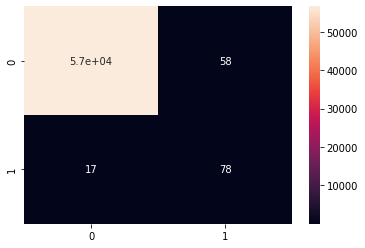

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# Convert probabilities to class labels
y_pred = np.round(y_pred)

# Compute evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrx = confusion_matrix(y_test, y_pred)
auc_roc = roc_auc_score(y_test, y_pred)


print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("AUC-ROC:", auc_roc)
sns.heatmap(conf_matrx,annot=True)

## 2. Training a model that considers the data as a timeseries

In [ ]:
from tensorflow import keras
# for this, we will be using LSTM to train

# we have to reshape the data for LSTM
n_steps=1
n_features=X_train_res.shape[1]
X_train_lstm = X_train_res.values.reshape((X_train_res.shape[0], n_steps, n_features))
X_test_lstm = X_test.values.reshape((X_test.shape[0], n_steps, n_features))

# Define the LSTM model
model = keras.Sequential()
model.add(keras.layers.LSTM(50, input_shape=(n_steps, n_features)))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_lstm, y_train_res, epochs=4, batch_size=32, validation_split=0.2,
                    callbacks=[keras.callbacks.EarlyStopping(monitor='accuracy', patience=5, mode='max', restore_best_weights=True)])

Epoch 1/4
11331/11331 [==============================] - 61s 5ms/step - loss: 0.0536 - accuracy: 0.9816 - val_loss: 0.0141 - val_accuracy: 0.9987
Epoch 2/4
11331/11331 [==============================] - 61s 5ms/step - loss: 0.0168 - accuracy: 0.9952 - val_loss: 0.0048 - val_accuracy: 1.0000
Epoch 3/4
11331/11331 [==============================] - 61s 5ms/step - loss: 0.0113 - accuracy: 0.9971 - val_loss: 0.0030 - val_accuracy: 1.0000
Epoch 4/4
11331/11331 [==============================] - 62s 5ms/step - loss: 0.0088 - accuracy: 0.9978 - val_loss: 0.0016 - val_accuracy: 1.0000


### Model prediction

In [ ]:
# Prediction from test set
y_pred = model.predict(X_test_lstm)

# saving the deep learning model for the web service
model.save('lstm.hdf5')

1774/1774 [==============================] - 3s 2ms/step


### Model Evaluation

Accuracy: 0.9983963627392239
Precision: 0.5133333333333333
Recall: 0.8105263157894737
F1-score: 0.6285714285714286
AUC-ROC: 0.9046188621188458


<AxesSubplot:>

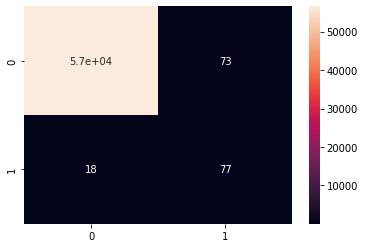

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# Convert probabilities to class labels
y_pred = np.round(y_pred)

# Compute evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc_roc = roc_auc_score(y_test, y_pred)
conf_matrx = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("AUC-ROC:", auc_roc)
sns.heatmap(conf_matrx,annot=True)


## 3. Training a model to perform classification (Binary Classification)

###Preprocessing data for classification model

In [ ]:
#selecting features, remove time column and convert the amount to log-space
cleaned_df = data.copy()

cleaned_df.pop('Time (second)')

# The `Amount` column covers a huge range. Convert to log-space.
eps = 0.001 # 0 => 0.1¢
cleaned_df['Log Amount'] = np.log(cleaned_df.pop('Amount')+eps)


In [ ]:
#apply standard scaler
sc = StandardScaler()
X_clean=cleaned_df.drop('Class', axis=1)
X_clean=sc.fit_transform(X_clean)
X_clean=pd.DataFrame(X_clean)

y_clean=cleaned_df['Class']

X_clean.head()

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,-0.701082,-0.041687,1.680101,0.976623,-0.247020,0.348012,0.193700,0.084434,0.333534,0.085688,...,0.326273,-0.024777,0.383483,-0.177444,0.110157,0.247059,-0.392622,0.333033,-0.065850,1.020107
1,0.608792,0.164138,0.109279,0.318998,0.042258,-0.060980,-0.065656,0.072903,-0.231703,-0.153784,...,-0.089963,-0.311372,-0.881454,0.162081,-0.561503,0.321175,0.260854,-0.027154,0.043219,-0.965674
2,-0.700336,-0.811337,1.174270,0.270648,-0.366756,1.352655,0.643223,0.210788,-1.381169,0.194242,...,0.681564,0.343094,1.065068,1.457772,-1.138484,-0.628161,-0.288861,-0.144325,-0.183824,1.478987
3,-0.499064,-0.109972,1.187383,-0.608355,-0.008814,0.937245,0.192079,0.320843,-1.264664,-0.049713,...,-0.270428,-0.149093,0.007299,-0.305465,-1.941446,1.242487,-0.460694,0.154039,0.185687,0.925292
4,-0.597606,0.535539,1.025470,0.287092,-0.297036,0.072873,0.481517,-0.228725,0.747917,0.700958,...,0.530343,-0.012516,1.101780,-0.220709,0.232904,-0.394800,1.041677,0.550001,0.654234,0.644646


In [ ]:
# split the dataset into training and test sets

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_clean, y_clean, test_size=0.2, stratify=y_clean, random_state=42)

print(y_test.value_counts())


0    56651
1       95
Name: Class, dtype: int64


## Training the model

In [ ]:
#this helps with overfitting
from keras.engine.base_layer import regularizers

#defining bias initializer
neg, pos = np.bincount(y_clean)

output_bias=np.log([pos/neg])
output_bias = keras.initializers.Constant(output_bias)

network = Sequential()

# Add fully connected layer with a ReLU activation function
network.add(keras.layers.Dense(units=29,
                         activation="relu",
                         kernel_regularizer=regularizers.l2(0.01),
                         input_shape=(29,)))

# Add fully connected layer with a ReLU activation function
network.add(keras.layers.Dense(units=29, kernel_regularizer=regularizers.l2(0.01), activation="relu"))

# Add fully connected layer with a sigmoid activation function
network.add(keras.layers.Dense(units=1, activation="sigmoid", bias_initializer=output_bias))

opt=keras.optimizers.Adam(learning_rate=1e-3)
# Compile neural network
network.compile(loss="binary_crossentropy",
                optimizer=opt,
                metrics=["accuracy"])

# Train neural network
history = network.fit(X_train,
                      y_train,
                      epochs=20,
                      verbose=1,
                      batch_size=128,
                      validation_split=0.2)



Epoch 1/20
1419/1419 [==============================] - 7s 4ms/step - loss: 0.0490 - accuracy: 0.9985 - val_loss: 0.0081 - val_accuracy: 0.9989
Epoch 2/20
1419/1419 [==============================] - 6s 4ms/step - loss: 0.0081 - accuracy: 0.9987 - val_loss: 0.0067 - val_accuracy: 0.9989
Epoch 3/20
1419/1419 [==============================] - 6s 4ms/step - loss: 0.0072 - accuracy: 0.9989 - val_loss: 0.0063 - val_accuracy: 0.9988
Epoch 4/20
1419/1419 [==============================] - 5s 4ms/step - loss: 0.0067 - accuracy: 0.9989 - val_loss: 0.0056 - val_accuracy: 0.9993
Epoch 5/20
1419/1419 [==============================] - 6s 4ms/step - loss: 0.0063 - accuracy: 0.9991 - val_loss: 0.0053 - val_accuracy: 0.9993
Epoch 6/20
1419/1419 [==============================] - 5s 4ms/step - loss: 0.0060 - accuracy: 0.9991 - val_loss: 0.0053 - val_accuracy: 0.9993
Epoch 7/20
1419/1419 [==============================] - 5s 4ms/step - loss: 0.0059 - accuracy: 0.9991 - val_loss: 0.0050 - val_accuracy:

Plotting loss and accuracy scores

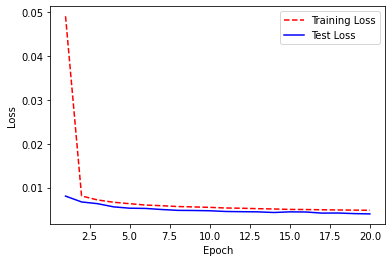

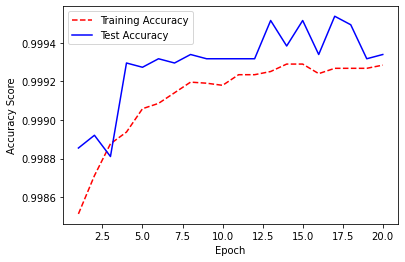

In [ ]:
# Get training and test loss histories
training_loss = history.history["loss"]
test_loss = history.history["val_loss"]

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_loss, "r--")
plt.plot(epoch_count, test_loss, "b-")
plt.legend(["Training Loss", "Test Loss"])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show();

# Get training and test accuracy histories
training_accuracy = history.history["accuracy"]
test_accuracy = history.history["val_accuracy"]
plt.plot(epoch_count, training_accuracy, "r--")
plt.plot(epoch_count, test_accuracy, "b-")

# Visualize accuracy history
plt.legend(["Training Accuracy", "Test Accuracy"])
plt.xlabel("Epoch")
plt.ylabel("Accuracy Score")
plt.show();

# Visualize network architecture
# https://zhang-yang.medium.com/how-to-plot-keras-models-493469884fd5
# network.summary()
# plot_model(network,to_file='network.png',show_shapes=True)
# Image('network.png')
# SVG(model_to_dot(network, show_shapes=True).create(prog="dot", format="svg"))

### Model Prediction and Evaluation

In [ ]:
#Test set Prediction
y_prob = network.predict(X_test)

Threshold = y_prob.mean()
y_pred = (y_prob>Threshold).astype(int)

1774/1774 [==============================] - 3s 2ms/step


Accuracy Score: 0.9881753780002115
F1 Score: 0.19059107358262967
Precision Score: 0.10762942779291552
Recall Score: 0.8315789473684211
AUROC Score: 0.9521217166232027


<AxesSubplot:>

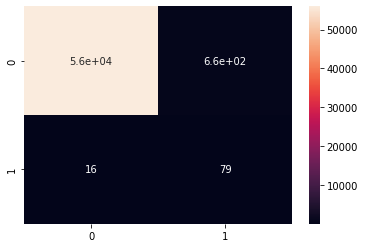

In [ ]:
#Evaluating models
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

print(f"Accuracy Score: {accuracy_score(y_test, y_pred)}")
print(f"F1 Score: {f1_score(y_test, y_pred)}")
print(f"Precision Score: {precision_score(y_test, y_pred)}")
print(f"Recall Score: {recall_score(y_test, y_pred)}")
print(f"AUROC Score: {roc_auc_score(y_test, y_prob)}")
sns.heatmap(confusion_matrix(y_test, y_pred),annot=True)


### 4) Model for Anomaly Detection (Autoencoder Model)

###Preprocessing Data for Autoencoder model

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X=data.drop(['Time (second)','Amount'], axis=1)
y=data['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

valid_X_train=X_train[X_train['Class']==0]
fraud_X_train=X_train[X_train['Class']==1]
valid_X_train=valid_X_train.drop(['Class'],axis=1)
fraud_X_train=fraud_X_train.drop(['Class'],axis=1)

valid_X_test=X_test[X_test['Class']==0]
fraud_X_test=X_test[X_test['Class']==1]
valid_X_test=valid_X_test.drop(['Class'],axis=1)
fraud_X_test=fraud_X_test.drop(['Class'],axis=1)

sc = StandardScaler()
valid_X_train=sc.fit_transform(valid_X_train)
fraud_X_train=sc.fit_transform(fraud_X_train)

valid_X_test=sc.fit_transform(valid_X_test)
fraud_X_test=sc.fit_transform(fraud_X_test)

X_train=X_train.drop(['Class'],axis=1)
X_train=sc.fit_transform(X_train)
X_test=X_test.drop(['Class'],axis=1)
X_test=sc.fit_transform(X_test)

###Training the Autoencoder model

In [ ]:
from tensorflow import keras
model=keras.Sequential()
model.add(keras.layers.Dense(16, activation='relu'))
model.add(keras.layers.Dense(8, activation='relu'))
model.add(keras.layers.Dense(16, activation='relu'))
model.add(keras.layers.Dense(28, activation='sigmoid'))

In [ ]:
class AutoEncoder(keras.Model):
  def __init__(self):
    super(AutoEncoder, self).__init__()
    self.encoder=keras.Sequential([
      # model.add(keras.layers.Dense(64, activation='relu')),
      # model.add(keras.layers.Dense(32, activation='relu')),
      model.add(keras.layers.Dense(16, activation='relu')),
      model.add(keras.layers.Dense(8, activation='relu'))
      ])
    self.decoder=keras.Sequential([
      model.add(keras.layers.Dense(16, activation='relu')),
      # model.add(keras.layers.Dense(32, activation='relu')),
      # model.add(keras.layers.Dense(64, activation='relu')),
      model.add(keras.layers.Dense(28, activation='sigmoid'))
    ])

    def call(self,x):
      encoded=self.encoder(x)
      decoded=self.decoder(encoded)
      return decoded


In [ ]:
early_stopping=keras.callbacks.EarlyStopping(monitor='val_loss',patience=2,mode='min')
model.compile(optimizer='adam',loss='mae', metrics=['accuracy'])

In [ ]:
history=model.fit(valid_X_train,valid_X_train,
                  epochs=20,
                  batch_size=128,
                  validation_data=(X_train,X_train),
                  shuffle=True,
                  callbacks=[early_stopping])


Epoch 1/20
1771/1771 [==============================] - 13s 7ms/step - loss: 0.6132 - accuracy: 0.2122 - val_loss: 0.5684 - val_accuracy: 0.2965
Epoch 2/20
1771/1771 [==============================] - 11s 6ms/step - loss: 0.5663 - accuracy: 0.3478 - val_loss: 0.5534 - val_accuracy: 0.3664
Epoch 3/20
1771/1771 [==============================] - 11s 6ms/step - loss: 0.5586 - accuracy: 0.3743 - val_loss: 0.5488 - val_accuracy: 0.3756
Epoch 4/20
1771/1771 [==============================] - 11s 6ms/step - loss: 0.5543 - accuracy: 0.3796 - val_loss: 0.5450 - val_accuracy: 0.3801
Epoch 5/20
1771/1771 [==============================] - 11s 6ms/step - loss: 0.5510 - accuracy: 0.3870 - val_loss: 0.5423 - val_accuracy: 0.3902
Epoch 6/20
1771/1771 [==============================] - 9s 5ms/step - loss: 0.5487 - accuracy: 0.3944 - val_loss: 0.5404 - val_accuracy: 0.3966
Epoch 7/20
1771/1771 [==============================] - 9s 5ms/step - loss: 0.5471 - accuracy: 0.4003 - val_loss: 0.5396 - val_accu

### Model prediction and Evaluation

1774/1774 [==============================] - 3s 1ms/step
Accuracy Score: 0.817291086596412
F1 Score: 0.01594533029612756
Precision Score: 0.008045206397854611
Recall Score: 0.8842105263157894
AUROC Score: 0.8506946967071701


<AxesSubplot:>

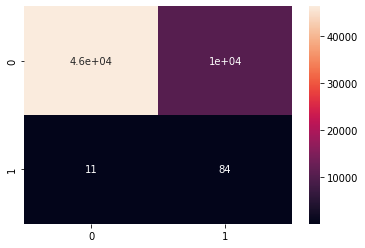

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import numpy as np
y_prob = np.mean(np.square(X_test-model.predict(X_test)), axis=1)
threshold=y_prob.mean()
y_pred=(y_prob>threshold).astype(int)

print(f"Accuracy Score: {accuracy_score(y_test, y_pred)}")
print(f"F1 Score: {f1_score(y_test, y_pred)}")
print(f"Precision Score: {precision_score(y_test, y_pred)}")
print(f"Recall Score: {recall_score(y_test, y_pred)}")
print(f"AUROC Score: {roc_auc_score(y_test, y_pred)}")
sns.heatmap(confusion_matrix(y_test, y_pred),annot=True)

